# Apply ML algorithms
Xgboost Regressor

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("G:\\KHULNA DATA CSV\\New Data\\CombineKhulnaDataset.csv")

In [3]:
data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1-Jan,21.00,25.5,18.00,1010.90,77.00,5.10,0.00,4.13,346.0,EU
1,2,18.60,22.5,16.00,1011.70,85.00,5.00,0.00,4.13,39.0,G
2,3,17.40,23.2,13.50,1012.70,72.00,4.80,1.70,7.60,346.0,EU
3,4,17.54,24.0,12.54,1012.67,76.27,4.39,0.51,4.13,396.0,EU
4,5,17.54,24.0,12.54,1012.67,76.27,4.39,0.51,4.13,372.0,EU


In [4]:
data.shape

(1007, 11)

In [5]:
data = data.drop(['D'], axis = 1)
data

,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,21.00,25.50,18.00,1010.90,77.00,5.10,0.00,4.13,346.0,EU
1,18.60,22.50,16.00,1011.70,85.00,5.00,0.00,4.13,39.0,G
2,17.40,23.20,13.50,1012.70,72.00,4.80,1.70,7.60,346.0,EU
3,17.54,24.00,12.54,1012.67,76.27,4.39,0.51,4.13,396.0,EU
4,17.54,24.00,12.54,1012.67,76.27,4.39,0.51,4.13,372.0,EU
...,...,...,...,...,...,...,...,...,...,...
1002,17.00,25.00,11.00,1013.70,68.00,4.70,0.00,3.50,277.0,VU
1003,19.71,26.27,14.30,1014.52,75.62,4.46,0.02,3.50,308.0,EU
1004,19.71,26.27,14.30,1014.52,75.62,4.46,0.02,3.50,275.0,VU
1005,19.71,26.27,14.30,1014.52,75.62,4.46,0.02,3.50,234.0,VU


In [6]:
data.isnull().sum()

T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

<AxesSubplot:>

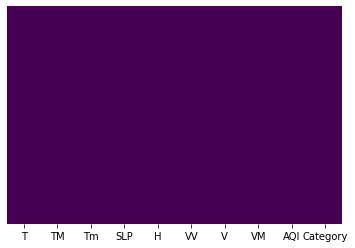

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Categorical Value Handling - (Label Encoding Method)

In [8]:
data['Category'].unique()

array(['EU', 'G', 'VU', 'U', 'C', 'M'], dtype=object)

# Import Label Encoder

In [9]:
from sklearn import preprocessing

In [10]:
encode = preprocessing.LabelEncoder()
data['Category'] = encode.fit_transform(data['Category'])

In [11]:
data['Category'].unique()

array([1, 2, 5, 4, 0, 3])

In [12]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,21.00,25.5,18.00,1010.90,77.00,5.10,0.00,4.13,346.0,1
1,18.60,22.5,16.00,1011.70,85.00,5.00,0.00,4.13,39.0,2
2,17.40,23.2,13.50,1012.70,72.00,4.80,1.70,7.60,346.0,1
3,17.54,24.0,12.54,1012.67,76.27,4.39,0.51,4.13,396.0,1
4,17.54,24.0,12.54,1012.67,76.27,4.39,0.51,4.13,372.0,1


# Correalation Matrix

In [13]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
T,1.000000,0.945659,0.966267,-0.822265,0.196302,0.922334,0.436250,0.184945,-0.848419,-0.354369
TM,0.945659,1.000000,0.861041,-0.713858,-0.013926,0.892829,0.335693,0.121032,-0.752190,-0.330544
Tm,0.966267,0.861041,1.000000,-0.863422,0.406262,0.890910,0.457014,0.211589,-0.869776,-0.336501
SLP,-0.822265,-0.713858,-0.863422,1.000000,-0.426451,-0.769661,-0.556918,-0.216728,0.737532,0.351633
H,0.196302,-0.013926,0.406262,-0.426451,1.000000,0.143313,0.195565,0.168926,-0.354213,-0.006072
VV,0.922334,0.892829,0.890910,-0.769661,0.143313,1.000000,0.387312,0.176431,-0.806703,-0.339780
V,0.436250,0.335693,0.457014,-0.556918,0.195565,0.387312,1.000000,0.595583,-0.460642,-0.203019
VM,0.184945,0.121032,0.211589,-0.216728,0.168926,0.176431,0.595583,1.000000,-0.205455,-0.161174
AQI,-0.848419,-0.752190,-0.869776,0.737532,-0.354213,-0.806703,-0.460642,-0.205455,1.000000,0.264407
Category,-0.354369,-0.330544,-0.336501,0.351633,-0.006072,-0.339780,-0.203019,-0.161174,0.264407,1.000000


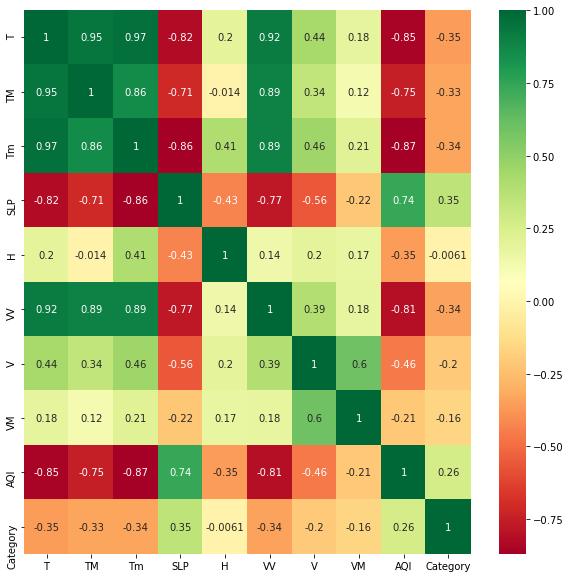

In [14]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
X = data.iloc[:,:-2] ##independent features
y = data.iloc[:,-2]  ##dependent features

In [16]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,21.00,25.5,18.00,1010.90,77.00,5.10,0.00,4.13
1,18.60,22.5,16.00,1011.70,85.00,5.00,0.00,4.13
2,17.40,23.2,13.50,1012.70,72.00,4.80,1.70,7.60
3,17.54,24.0,12.54,1012.67,76.27,4.39,0.51,4.13
4,17.54,24.0,12.54,1012.67,76.27,4.39,0.51,4.13


In [17]:
y.head()

0    346.0
1     39.0
2    346.0
3    396.0
4    372.0
Name: AQI, dtype: float64

In [18]:
y.isnull().sum()

0

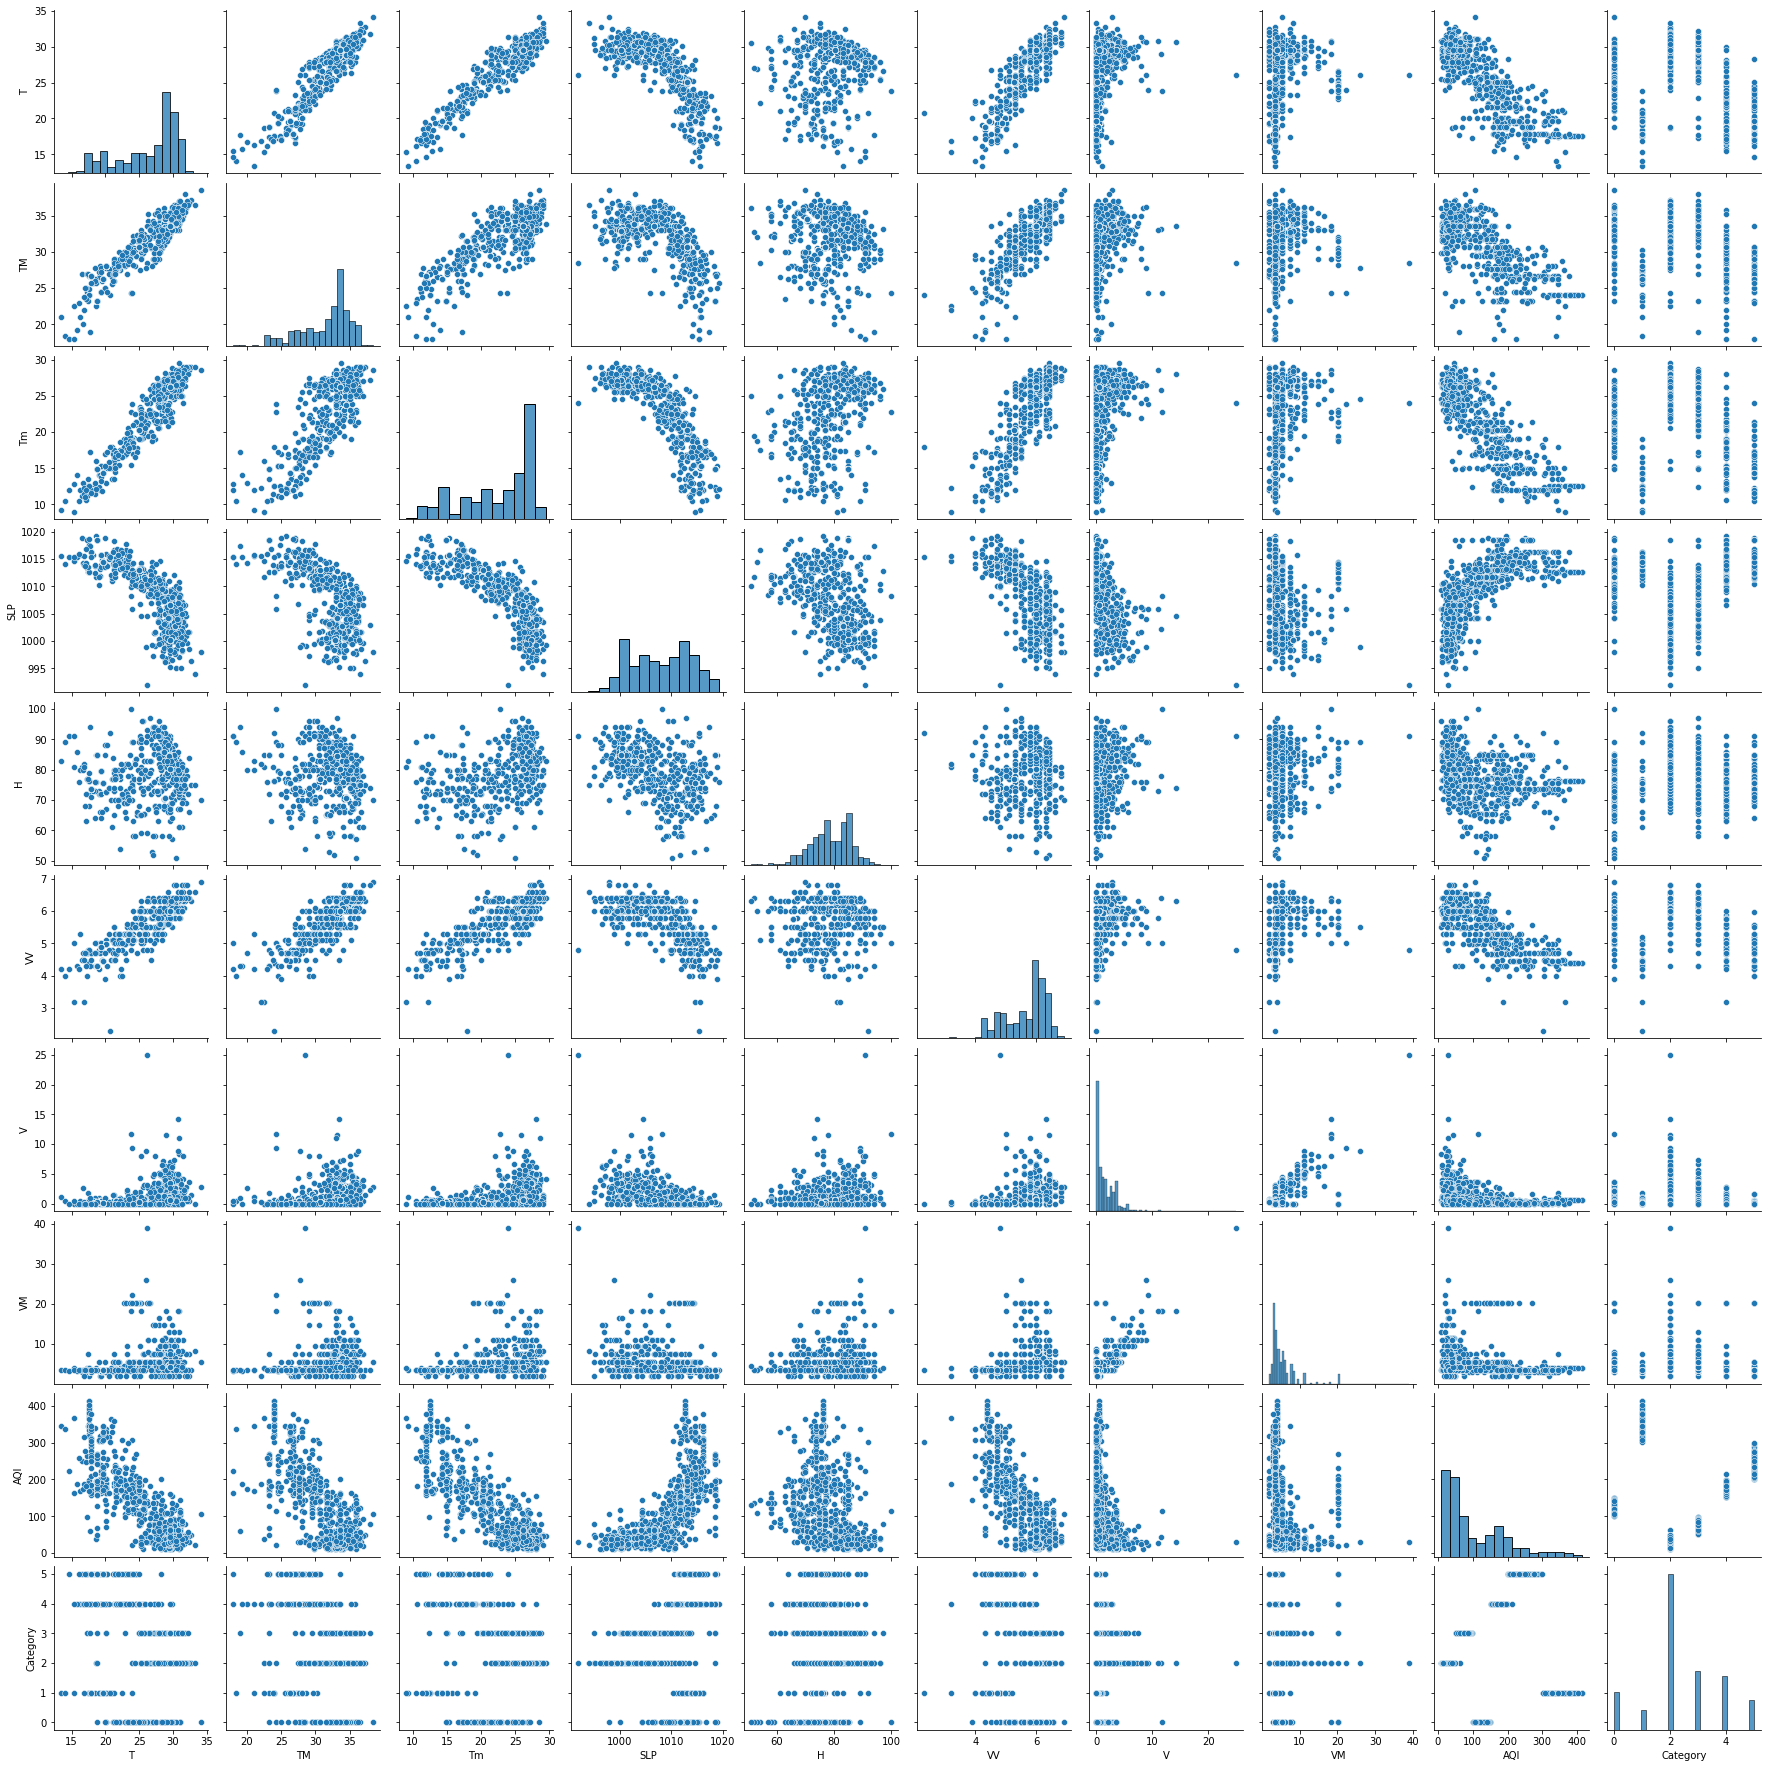

In [19]:
sns.pairplot(data)

# Feature Importance

We are using Extra Tree Regressor to find out top features from dataset.

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.26337902 0.1032206  0.30555136 0.13626248 0.02363098 0.12660557
 0.02003027 0.0213197 ]


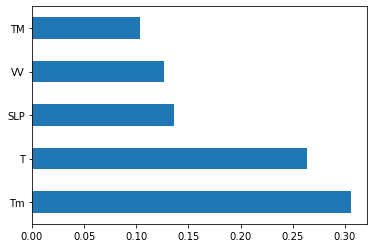

In [23]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

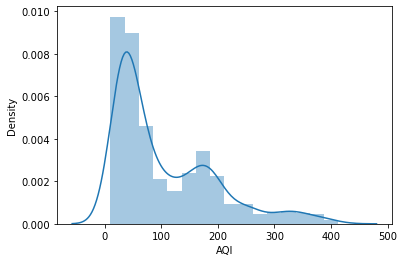

In [24]:
sns.distplot(y,kde=True)

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# M-6: Xgboost

In [28]:
#conda install py-xgboost
import xgboost as xgb

In [29]:
xg=xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
round(xg.score(X_train, y_train)*100,2)

92.57

In [31]:
round(xg.score(X_test, y_test)*100,2)

82.67

In [32]:
round(xg.score(X, y)*100,2)

89.46

In [33]:
#Cross Validation

from sklearn.model_selection import cross_val_score
score=cross_val_score(xg,X_train,y_train,cv=5)
round(score.mean()*100,2)

83.49

In [34]:
# Model Evaluation
from sklearn import metrics
prediction=xg.predict(X_test)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 25.121378461126447
MSE: 1451.7273950149622
RMSE: 38.10154058584721


# Hyperparameter Tuning

In [36]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [39]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [40]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [42]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [44]:
xg_random.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 25,
 'learning_rate': '0.05'}

In [45]:
round(xg_random.best_score_*100,2)

85.04

In [46]:
# Model Evaluation
predictions=xg_random.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.556827771781695
MSE: 1412.6687141621148
RMSE: 37.585485418737306
